In [80]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver

import string
import datetime
import time
import csv
import ast
import unicodedata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [1]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

def readYearRecords():
    with open('yearRecords.csv', mode='r') as infile:
        reader = csv.reader(infile)
        with open('yearReader.csv', mode='w') as outfile:
            writer = csv.writer(outfile)
            mydict = {rows[0]:rows[1] for rows in reader}

    for name in mydict:
        val = mydict[name]
        mydict[name] = eval(val)

    return mydict

In [2]:
yearRecords = readYearRecords()

In [4]:
yearRecords.keys()

dict_keys(['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2009', '2008', '2007', '2005', '2004', '2003', '2002', '2011', '2010', '2006', '2001', '2012', '2020'])

In [249]:
results = []
testers = []
for year, entries in yearRecords.items():
    if year == '2020':
        continue
    for team in entries:
        playerRecords = team[0]
        wins = team[1]
        losses = team[2]
        for players, record in playerRecords.items():
            ratio = wins/(wins+losses)
            recordWL = record + [ratio]
            if year != '2019':
                results.append(recordWL)
            else:
                testers.append(recordWL)
    


In [250]:
import csv

with open("recordFile.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(results)
    
with open("testerFile.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(testers)

In [251]:
dataset = pd.read_csv('recordFile.csv')
testSet = pd.read_csv('testerFile.csv')

In [252]:
testSet.head()

,1.7,3,2.28018018018018,222,-0.6666666666666666,-1.9666666666666668,-0.3000000000000001,0.18333333333333326,1.3666666666666665,0.2833333333333332,...,-33.315878035008474,31.454247311343288,323,19.115010681018585,34.616186711838886,32.34021676826381,292,21.10277184936276,38.15734989648032,0.7317073170731707
0,3.229630,54,3.110983,173,0.022222,-2.872222,1.044444,-0.405556,4.183333,-0.916667,...,-33.203318,31.565013,323,19.198481,34.717636,32.318267,292,21.069977,38.181504,0.731707
1,3.734375,32,3.226154,130,2.733333,1.333333,3.500000,3.366667,2.900000,3.666667,...,-33.197037,31.562943,323,19.192876,34.833578,32.392284,292,21.130939,38.287785,0.731707
2,3.963636,22,7.720690,58,4.200000,1.950000,4.750000,3.400000,9.550000,5.500000,...,-32.793414,31.671639,323,19.271137,34.920535,32.499308,292,21.228765,38.476190,0.731707
3,1.277273,66,0.040964,166,-1.505556,-3.261111,-1.286111,-0.138889,-1.705556,-4.363889,...,-32.660806,31.584682,323,19.256644,34.913288,32.412351,292,21.214273,38.468944,0.731707
4,0.000000,0,0.000000,0,8.600000,2.100000,10.200000,9.100000,15.400000,2.000000,...,-32.265153,31.671639,323,19.271137,34.920535,32.499308,292,21.228765,38.476190,0.731707


In [253]:
# X = dataset.iloc[:, 0:64].values
X_train = dataset.iloc[:, np.r_[0:34, 35, 39:64]].values
# X = dataset.iloc[:, np.r_[0:4, 12:32]].values #without 4-11
# X = dataset.iloc[:, np.r_[0:2, 3, 12:32]].values #without 2, 4-11
# X = dataset.iloc[:, np.r_[0:2, 3, 12:22, 24:32]].values #without 2, 22-23 4-11
y_train = dataset.iloc[:, 64].values

In [254]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [255]:
X_test = testSet.iloc[:, np.r_[0:34, 35, 39:64]].values
y_test = testSet.iloc[:, 64].values

In [256]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [257]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [258]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.06655303256215762
Mean Squared Error: 0.006491488837370306
Root Mean Squared Error: 0.08056977620280638


In [259]:
from sklearn.metrics import r2_score
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

Test Variance score: 0.71


In [260]:
importances = regressor.feature_importances_

Feature ranking:
1. feature 35 (0.506730)
2. feature 32 (0.169999)
3. feature 36 (0.037350)
4. feature 50 (0.025576)
5. feature 55 (0.025412)
6. feature 49 (0.022271)
7. feature 37 (0.017434)
8. feature 42 (0.016106)
9. feature 40 (0.015401)
10. feature 39 (0.015190)
11. feature 48 (0.014411)
12. feature 34 (0.012685)
13. feature 57 (0.012434)
14. feature 51 (0.012091)
15. feature 44 (0.010210)
16. feature 33 (0.009468)
17. feature 38 (0.009407)
18. feature 58 (0.009270)
19. feature 45 (0.008982)
20. feature 59 (0.007267)
21. feature 41 (0.007263)
22. feature 53 (0.006540)
23. feature 43 (0.006465)
24. feature 46 (0.004623)
25. feature 47 (0.004616)
26. feature 54 (0.004603)
27. feature 56 (0.004073)
28. feature 52 (0.003992)
29. feature 26 (0.000027)
30. feature 12 (0.000020)
31. feature 20 (0.000015)
32. feature 28 (0.000011)
33. feature 7 (0.000008)
34. feature 13 (0.000007)
35. feature 8 (0.000007)
36. feature 9 (0.000006)
37. feature 15 (0.000005)
38. feature 31 (0.000005)
39. fea

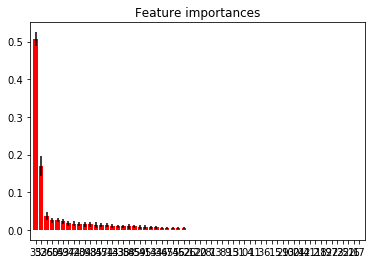

In [261]:
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

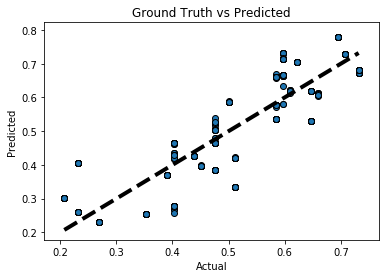

In [262]:
from sklearn.model_selection import cross_val_predict




fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()